# Stockprice Prediction using RNN


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
meta_data = pd.read_csv('C:/Daten/Neural_Networks/stock_prediction/symbols_valid_meta.csv')
print(meta_data.head())
print(meta_data.columns)
print(meta_data.shape)

  Nasdaq Traded Symbol                                      Security Name  \
0             Y      A            Agilent Technologies, Inc. Common Stock   
1             Y     AA                    Alcoa Corporation Common Stock    
2             Y   AAAU                       Perth Mint Physical Gold ETF   
3             Y   AACG  ATA Creativity Global - American Depositary Sh...   
4             Y   AADR                AdvisorShares Dorsey Wright ADR ETF   

  Listing Exchange Market Category ETF  Round Lot Size Test Issue  \
0                N                   N           100.0          N   
1                N                   N           100.0          N   
2                P                   Y           100.0          N   
3                Q               G   N           100.0          N   
4                P                   Y           100.0          N   

  Financial Status CQS Symbol NASDAQ Symbol NextShares  
0              NaN          A             A          N  
1       

In [7]:
#Load some stock data
stock_goog = pd.read_csv('C:/Daten/Neural_Networks/stock_prediction/stocks/GOOG.csv') #Alphabet Inc.
stock_tsla = pd.read_csv('C:/Daten/Neural_Networks/stock_prediction/stocks/TSLA.csv') #Tesla Inc.
stock_fb = pd.read_csv('C:/Daten/Neural_Networks/stock_prediction/stocks/FB.csv') #Facebook Inc.
stock_abb = pd.read_csv('C:/Daten/Neural_Networks/stock_prediction/stocks/ABB.csv') #Abb Ltd.
stock_novn = pd.read_csv('C:/Daten/Neural_Networks/stock_prediction/stocks/NOVN.csv') #Novartis AG
stock_rog = pd.read_csv('C:/Daten/Neural_Networks/stock_prediction/stocks/ROG.csv') #Roche Holding AG
stock_nvda = pd.read_csv('C:/Daten/Neural_Networks/stock_prediction/stocks/NVDA.csv') #Nvidia Corp.

In [ ]:
# Handle missing values
stock_goog.fillna(method='ffill', inplace=True)
stock_tsla.fillna(method='ffill', inplace=True)
stock_fb.fillna(method='ffill', inplace=True)
stock_abb.fillna(method='ffill', inplace=True)
stock_novn.fillna(method='ffill', inplace=True)
stock_rog.fillna(method='ffill', inplace=True)
stock_nvda.fillna(method='ffill', inplace=True)


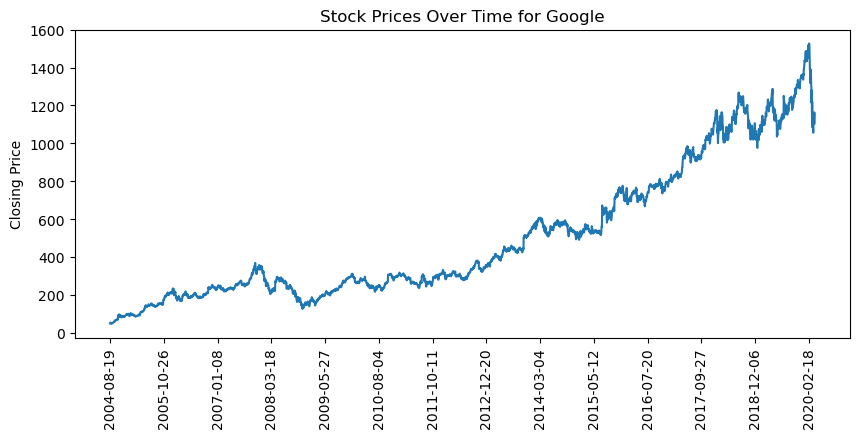

In [18]:
# Plot the closing price of google
plt.figure(figsize=(10, 4))
plt.plot(stock_goog['Date'], stock_goog['Close'])
# plt.xlabel('Date')
plt.xticks(np.arange(0, stock_goog.shape[0], step=300), stock_goog['Date'][0:stock_goog.shape[0]:300], rotation = 90)
plt.ylabel('Closing Price')
plt.title('Stock Prices Over Time for Google')
plt.show()

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
stock_goog_scaled = scaler.fit_transform(stock_goog['Close'].values.reshape(-1,1))

In [22]:
# Function to create sequences
def create_sequences(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        Y.append(data[i + time_step])
    return np.array(X), np.array(Y)

# Set the time step
time_step = 60  # You can adjust this value

# Create sequences
X, y = create_sequences(stock_goog_scaled, time_step)

# Reshape the data to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (3872, 60, 1)
Shape of y: (3872, 1)


In [23]:
# Build and train RNN Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, batch_size=1, epochs=1)

c:\Users\Kai\anaconda3\envs\stock_env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3872/3872 ━━━━━━━━━━━━━━━━━━━━ 55s 14ms/step - loss: 0.0028


In [ ]:
# Make predictions
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


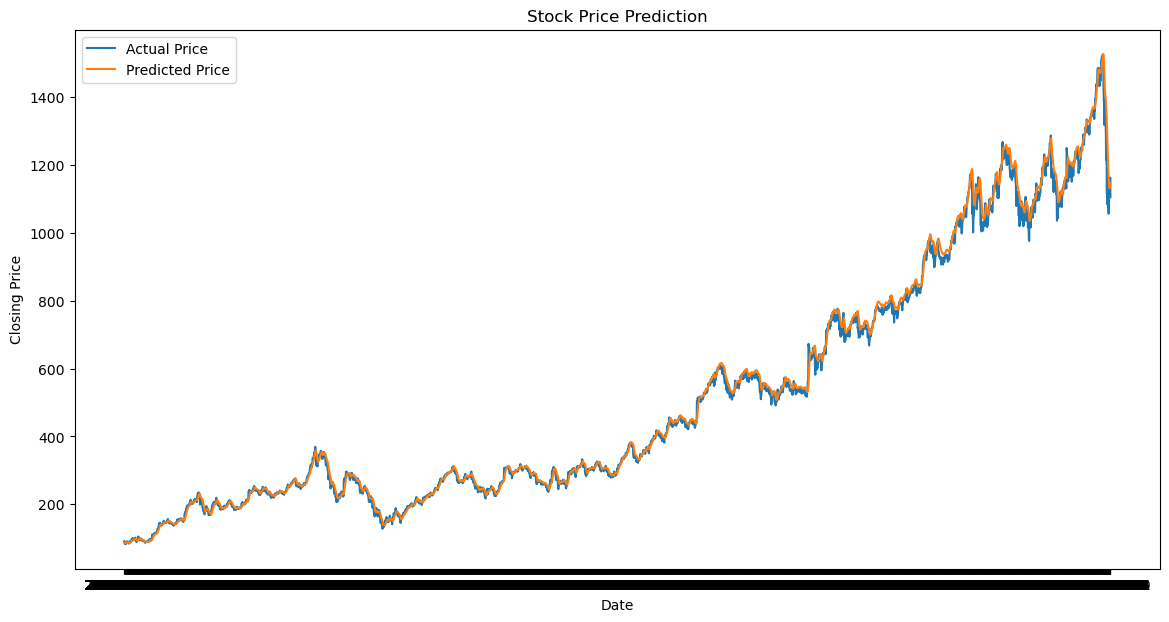

In [24]:
# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(stock_goog['Date'][time_step:], stock_goog['Close'][time_step:], label='Actual Price')
plt.plot(stock_goog['Date'][time_step:], predictions, label='Predicted Price')
# plt.xlabel('Date')
plt.xticks(np.arange(0, stock_goog.shape[0], step=300), stock_goog['Date'][0:stock_goog.shape[0]:300], rotation = 90)
plt.ylabel('Closing Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()